<a href="https://colab.research.google.com/github/avtar123/house-price-predection/blob/main/house_price_predection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Read CSV


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/train_house_price.csv")
test=pd.read_csv("/content/drive/MyDrive/house_prices_regression_techniques/test.csv")

Find Number of null value in each column

In [ ]:
pd.isnull(train).sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
values=pd.isnull(train).sum()

In [ ]:
nul_col = []
val=[]
for idx,i in enumerate(values):
  #print(i)
  if(i>0):
    nul_col.append(train.columns[idx])
    val.append(i)

Plot Grpah of null value

<BarContainer object of 19 artists>

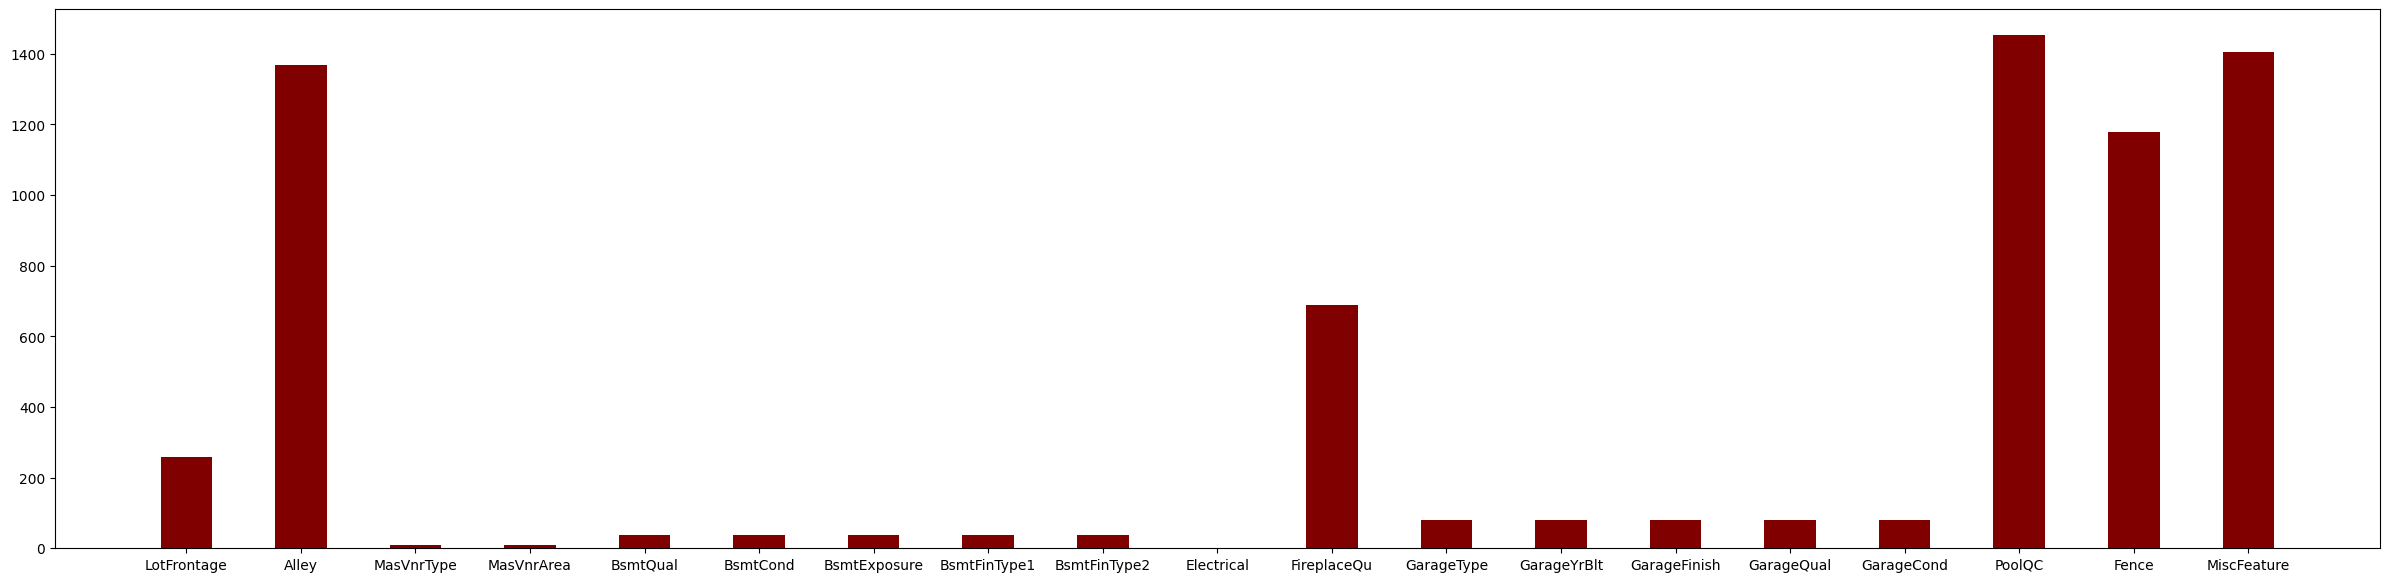

In [ ]:
fig = plt.figure(figsize = (30, 7))

# creating the bar plot
plt.bar(nul_col, val, color ='maroon',
        width = 0.45)

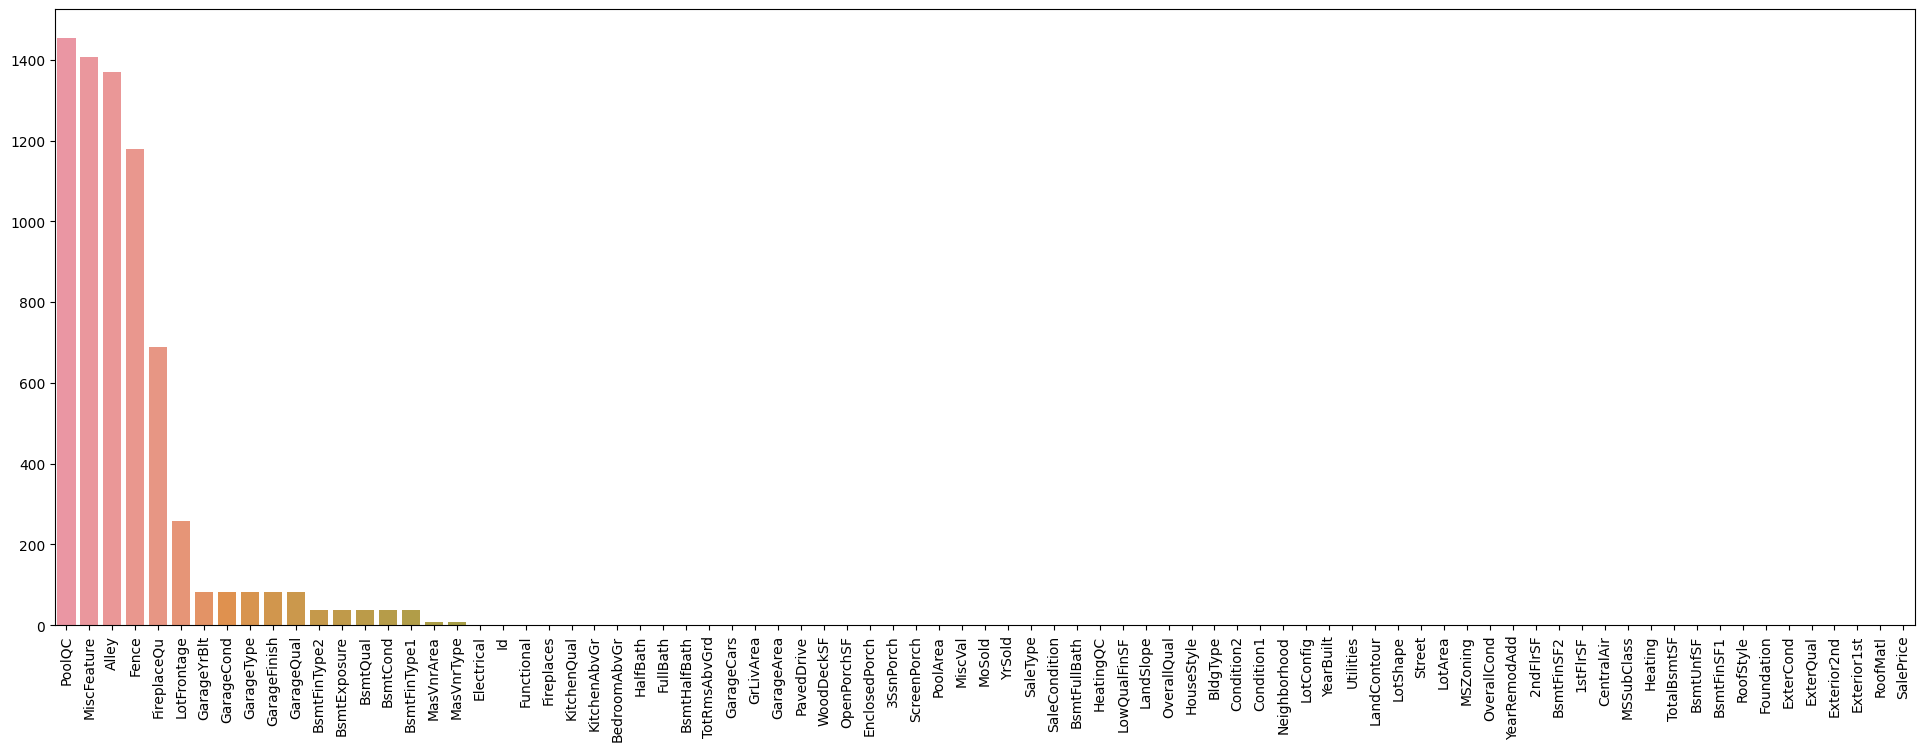

In [ ]:
plt.figure(figsize=(24,8))
cols_with_null=train.isnull().sum().sort_values(ascending=False)
sns.barplot(x=cols_with_null.index,y=cols_with_null)
plt.xticks(rotation=90)
plt.show;

In [ ]:
#decription of train Csv
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
cols_with_null.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

Dropping column with max null

In [ ]:
cols_to_drop=(cols_with_null.head(6).index).tolist()
train.drop(cols_to_drop,axis=1,inplace=True)
test.drop(cols_to_drop,axis=1,inplace=True)
train.shape

(1460, 75)

In [ ]:
test.shape

(1459, 74)

In [ ]:
pd.isnull(test).sum()

Id               0
MSSubClass       0
MSZoning         4
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64

Plot heatmap to find correlation

<ipython-input-307-e44f681ae1c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(train.corr(), center=0, cmap='BrBG', annot=True)


<Axes: >

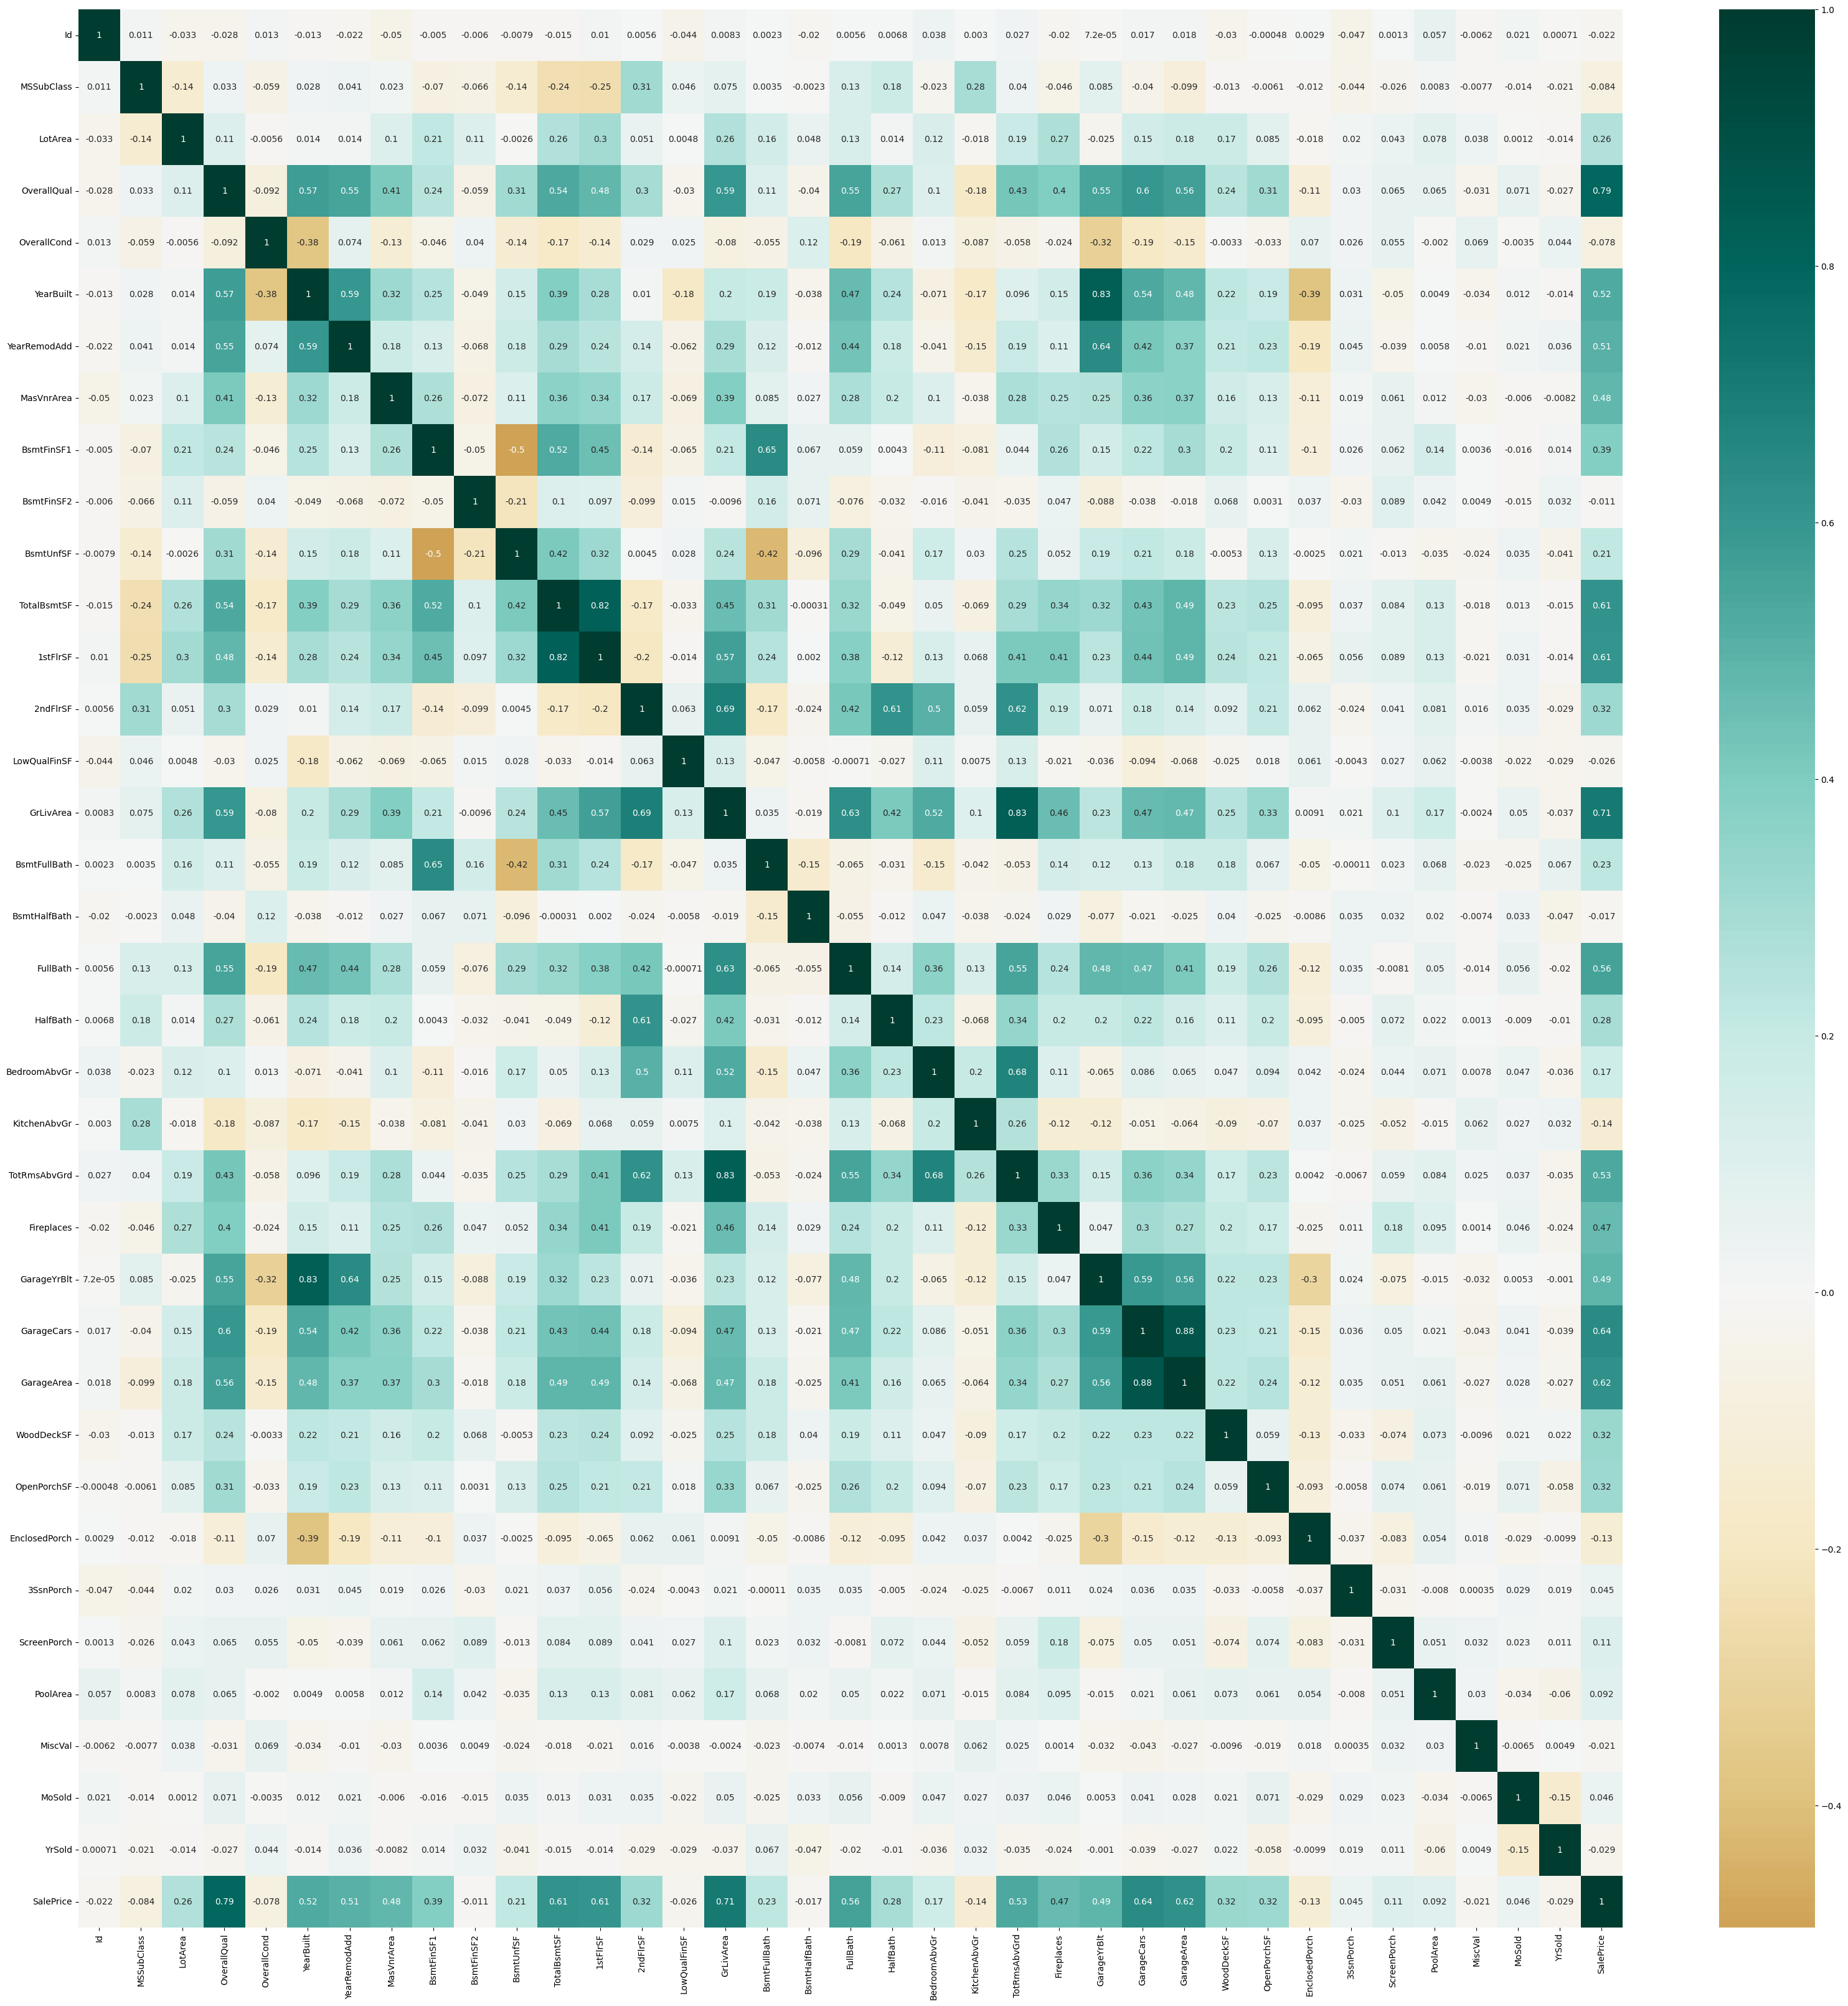

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
heatmap=sns.heatmap(train.corr(), center=0, cmap='BrBG', annot=True)
heatmap


In [ ]:
train.corr()

<ipython-input-308-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
MasVnrArea    -0.050298    0.022936  0.104160     0.411876    -0.128101   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772   -0.045569  0.271364     0.396765    -0.023820   
GarageYrBlt    0.000072    0.085072 -0.024947     0.547766    -0.324297   
GarageCars     0.016570   -0.040110  0.154871     0.600671    -0.185758   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
PoolArea       0.057044    0.008283  0.077672     0.065166    -0.001985   
MiscVal       -0.006242   -0.007683  0.038068    -0.031406     0.068777   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold         0.000712   -0.021407 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id             -0.012713     -0.021998   -0.050298   -0.005024   -0.005968   
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.344501    0.445863    0.097117   
2ndFlrSF        0.010308      0.140024    0.174561   -0.137079   -0.099260   


Dropping column in which relation bw traget & input is less than **0.12**

In [ ]:
li=[]
for row in train.corr():
    value = train.corr()[row][36]
    if value < 0.12:
      print(row,value)
      li.append(f"{row}")
print(li,len(li))

<ipython-input-242-0aeee6ea8c2c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for row in train.corr():
<ipython-input-242-0aeee6ea8c2c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  value = train.corr()[row][36]


Id -0.021916719443430967
MSSubClass -0.08428413512659509
OverallCond -0.07785589404867797
BsmtFinSF2 -0.011378121450215146
LowQualFinSF -0.02560613000067955
BsmtHalfBath -0.01684415429735895
KitchenAbvGr -0.13590737084214105
EnclosedPorch -0.1285779579259566
3SsnPorch 0.04458366533574838
ScreenPorch 0.11144657114291112
PoolArea 0.09240354949187318
MiscVal -0.021189579640303213
MoSold 0.046432245223819446
YrSold -0.028922585168736813
['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 14


In [ ]:
li2=[]
for row in train.corr():
    value = train.corr()[row][36]
    if value > 0.12:
      print(row,value)
      li2.append(f"{row}")
print(li2,len(li2))


LotArea 0.2638433538714051
OverallQual 0.7909816005838053
YearBuilt 0.5228973328794967
YearRemodAdd 0.5071009671113866
MasVnrArea 0.47749304709571444
BsmtFinSF1 0.3864198062421535
BsmtUnfSF 0.21447910554696928
TotalBsmtSF 0.6135805515591943


<ipython-input-243-10b9662b722d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for row in train.corr():
<ipython-input-243-10b9662b722d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  value = train.corr()[row][36]


1stFlrSF 0.6058521846919153
2ndFlrSF 0.31933380283206736
GrLivArea 0.7086244776126515
BsmtFullBath 0.22712223313149427
FullBath 0.5606637627484453
HalfBath 0.28410767559478256
BedroomAbvGr 0.16821315430073963
TotRmsAbvGrd 0.5337231555820284
Fireplaces 0.46692883675152763
GarageYrBlt 0.4863616774878596
GarageCars 0.6404091972583519
GarageArea 0.6234314389183622
WoodDeckSF 0.32441344456812926
OpenPorchSF 0.31585622711605504
SalePrice 1.0
['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'] 23


In [ ]:
train.drop(li,axis=1,inplace=True)

In [ ]:
len(li)

14

In [ ]:
test.drop(li,axis=1,inplace=True)

In [ ]:
train.shape

(1460, 61)

In [ ]:
test.shape

(1459, 60)

In [ ]:
len(li2)

23

**Finding & removing Outliers**

<ipython-input-250-20c2f8f98d4e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


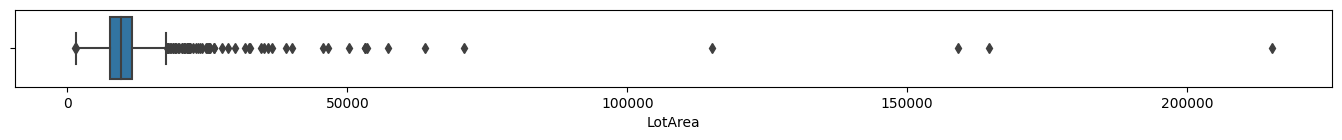

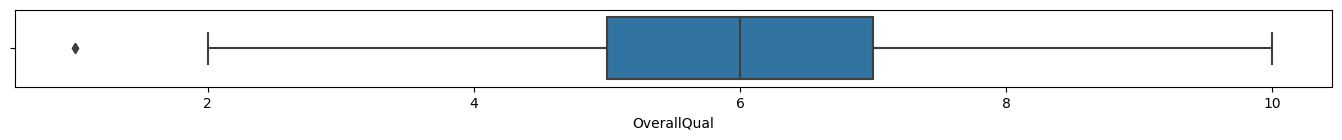

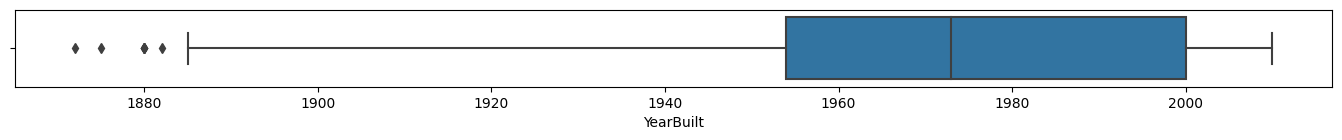

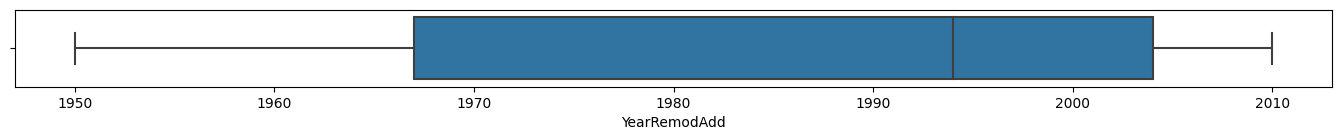

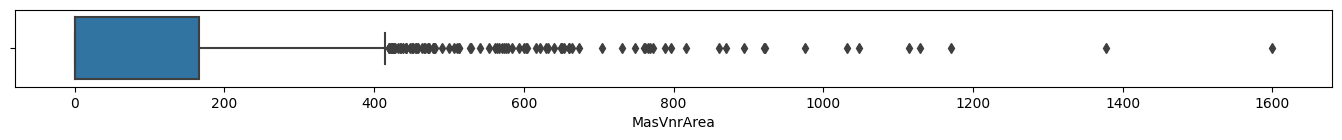

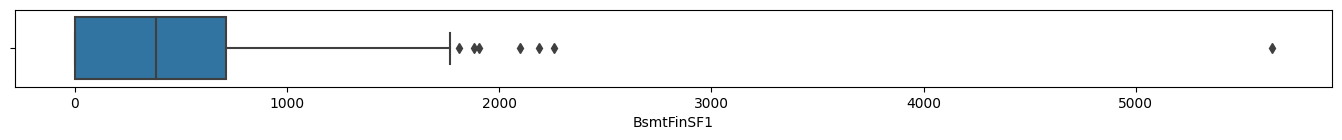

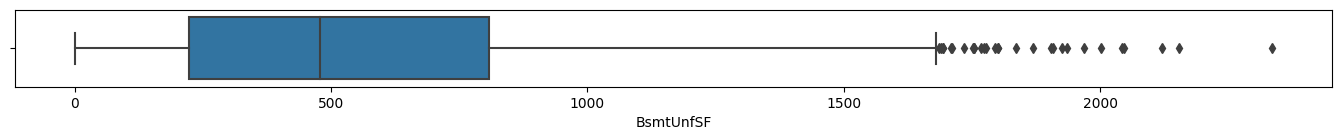

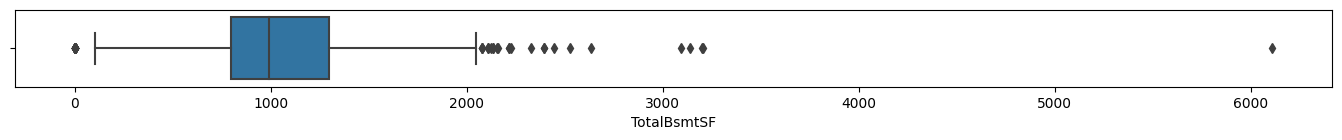

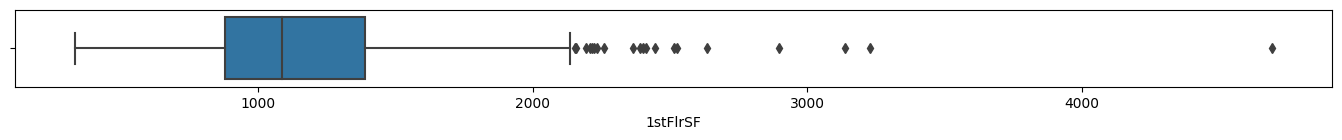

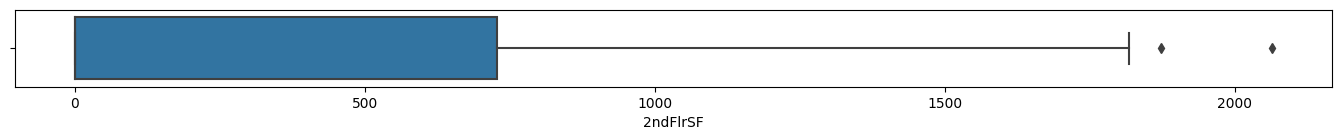

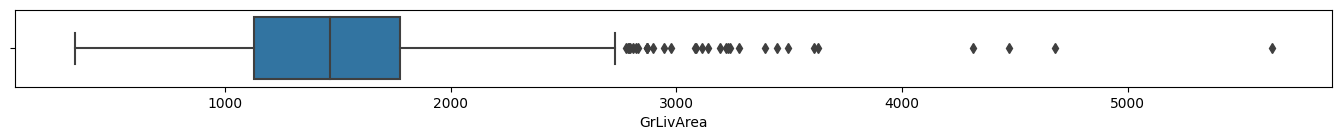

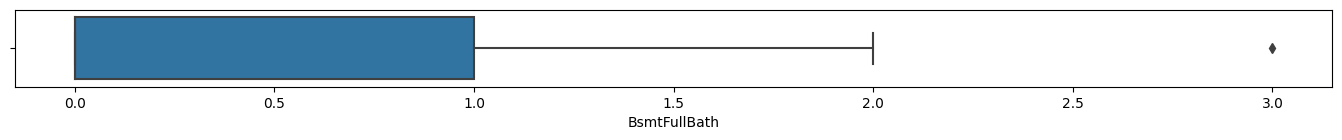

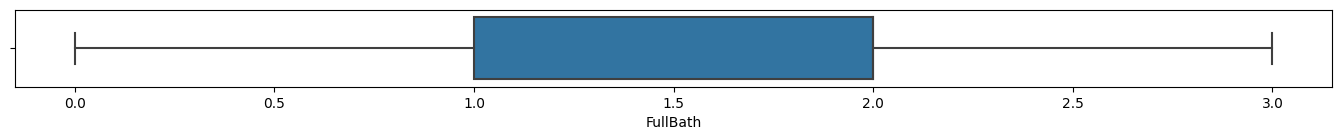

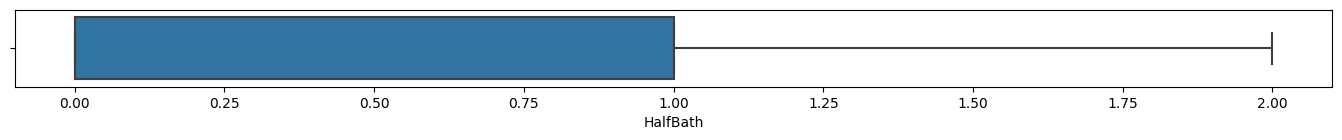

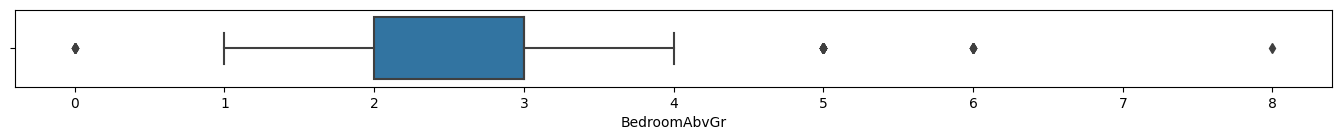

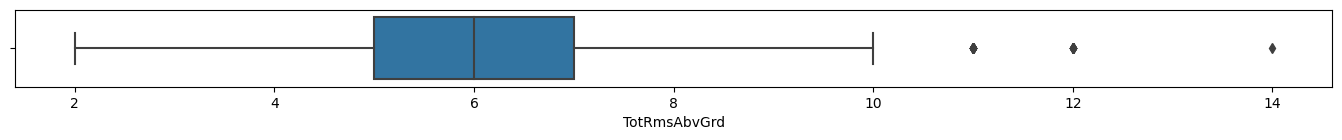

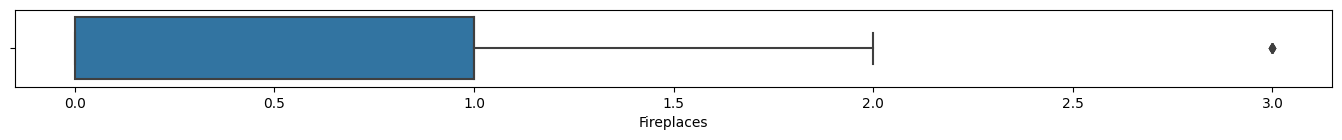

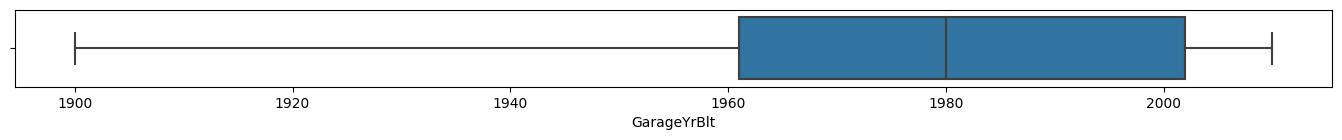

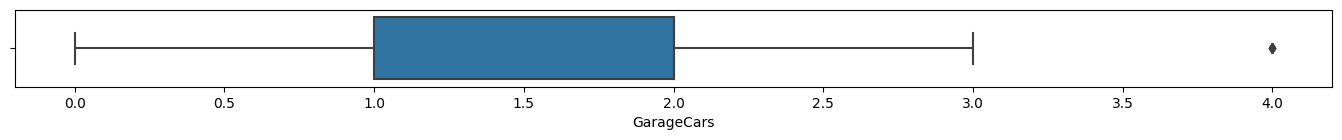

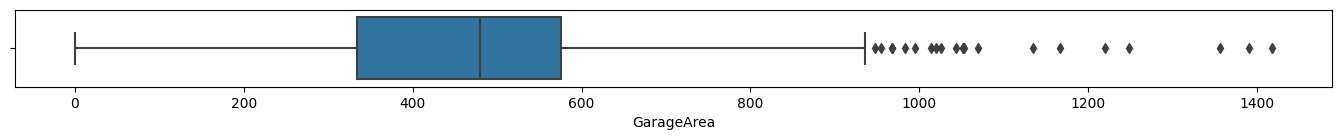

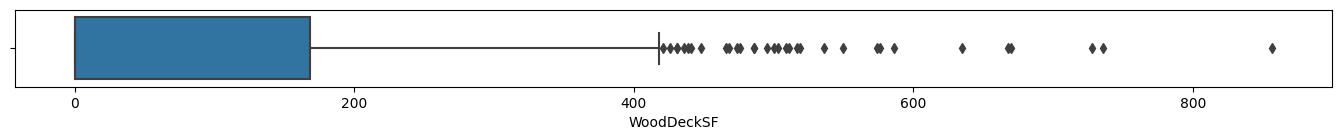

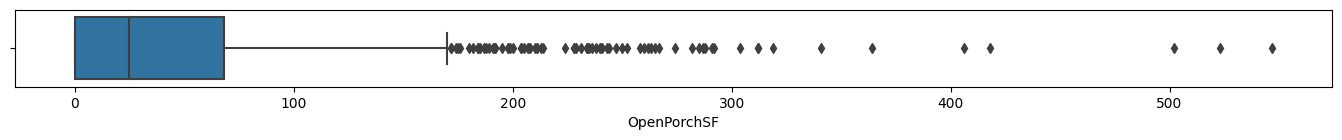

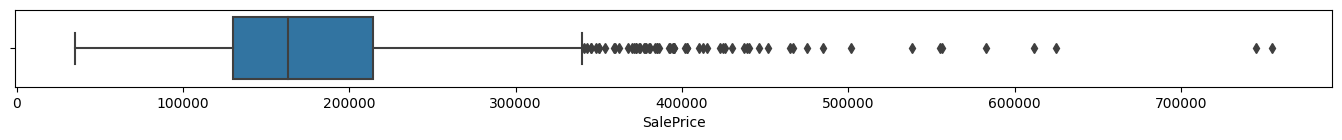

In [ ]:
# Box Plot
import seaborn as sns
for i in li2:
  #sns.boxplot(train[i])
  plt.figure(figsize=(17,1))
  sns.boxplot(data=train, x=i)



In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
for i in li2:
  Q1 = train[i].quantile(0.25)
  Q3 = train[i].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  # Create arrays of Boolean values indicating the outlier rows
  upper_array = np.where(train[i]>=upper)[0]
  lower_array = np.where(train[i]<=lower)[0]

  # Removing the outliers
  train.drop(train.index[upper_array],inplace=True)
  train.drop(train.index[lower_array],inplace=True)



<ipython-input-252-87b3d22741eb>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


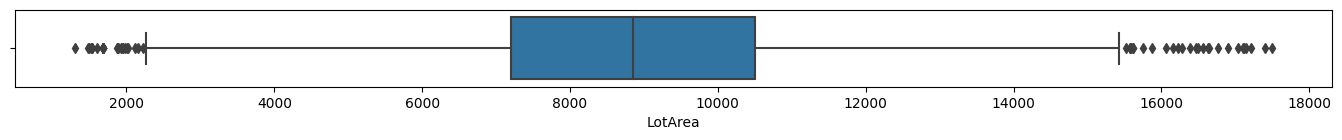

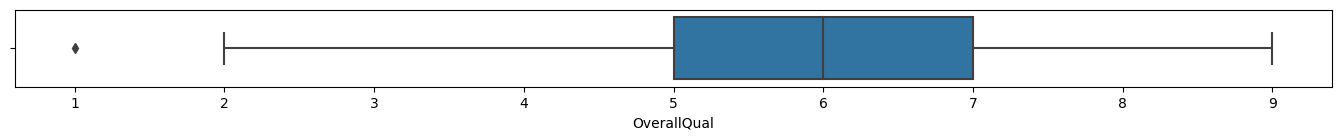

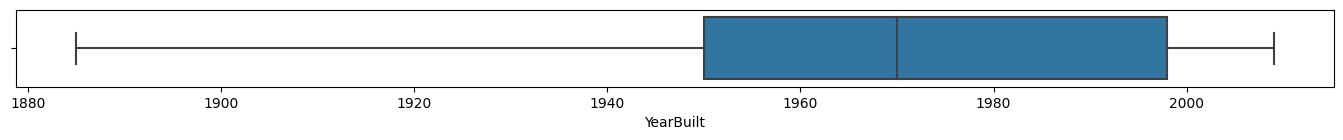

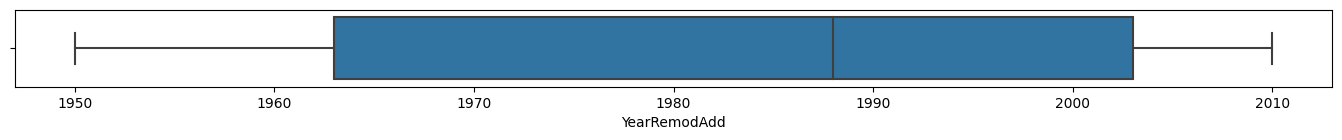

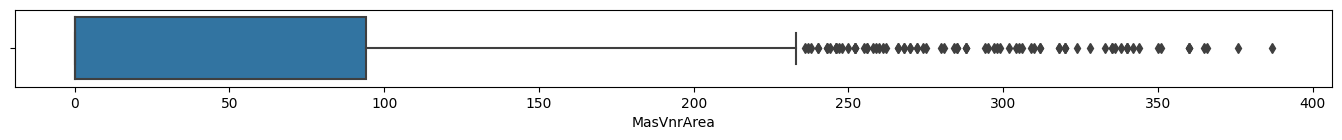

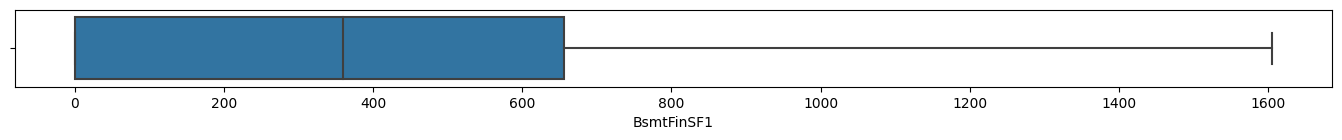

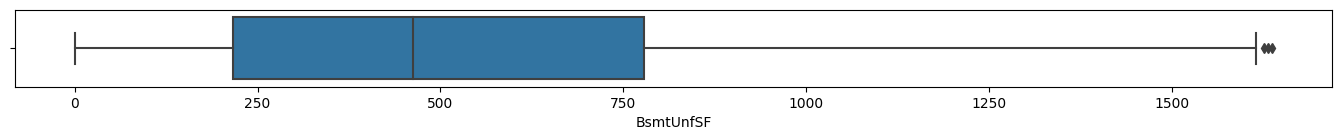

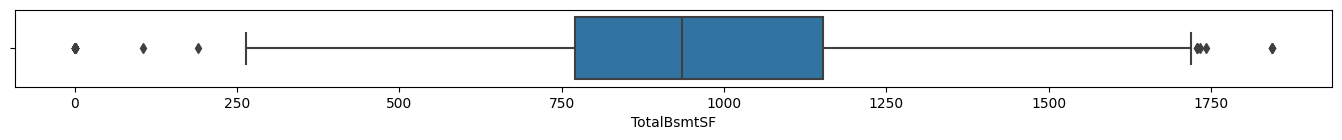

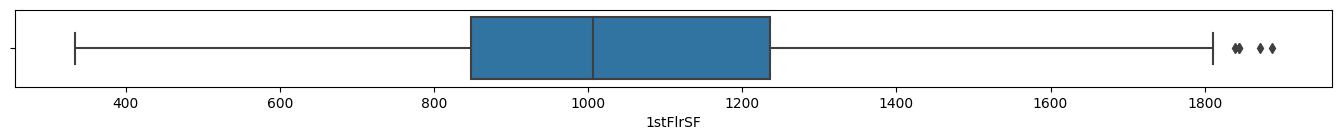

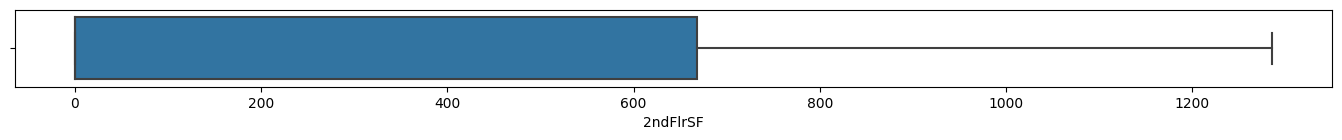

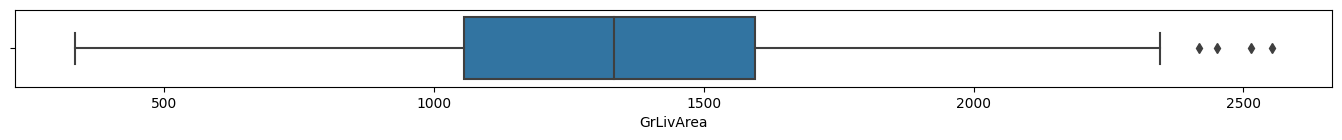

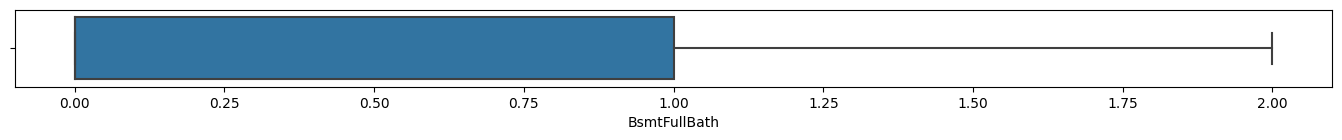

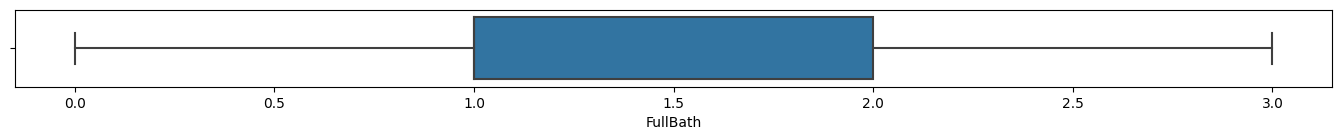

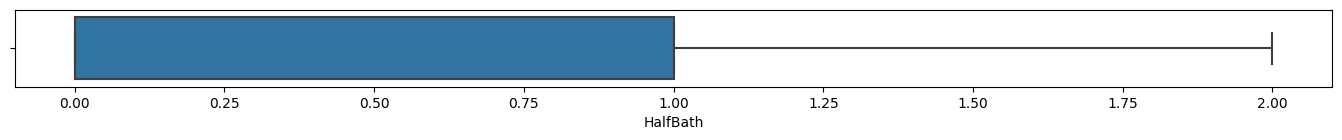

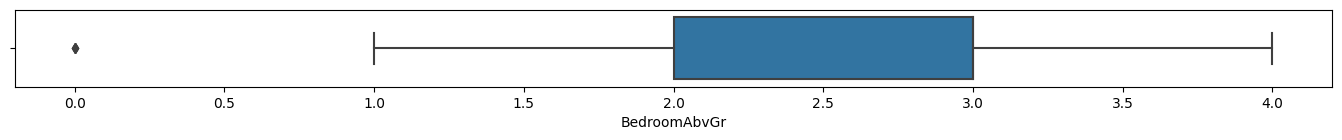

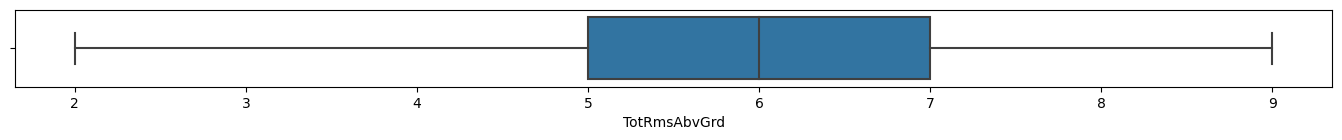

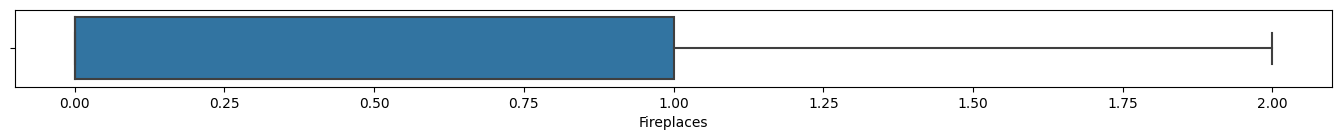

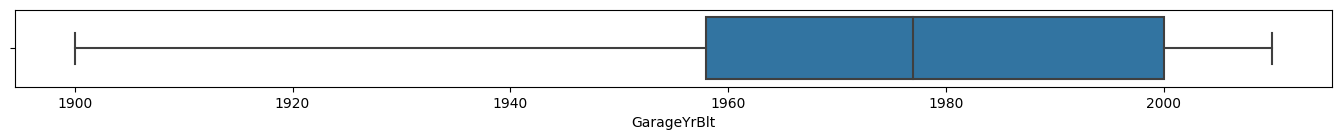

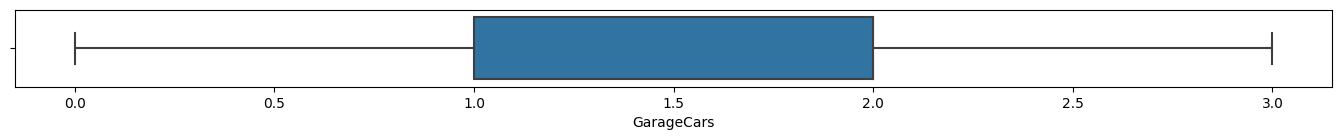

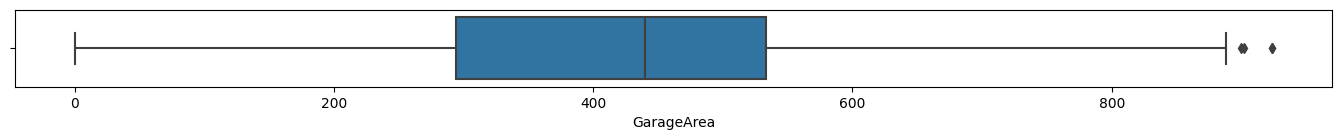

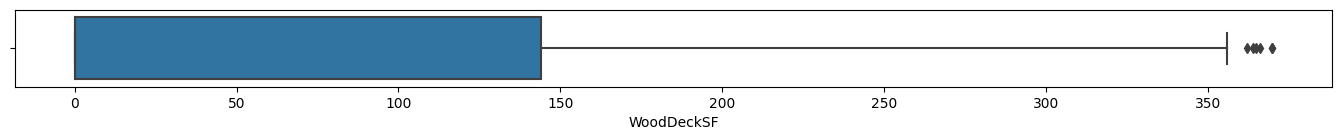

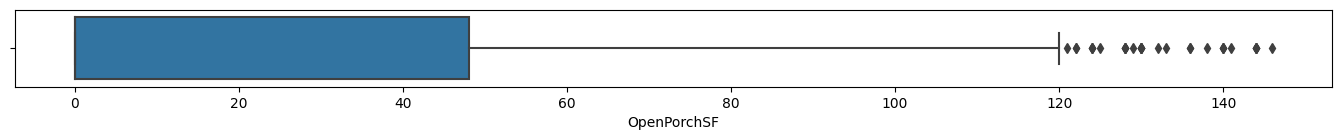

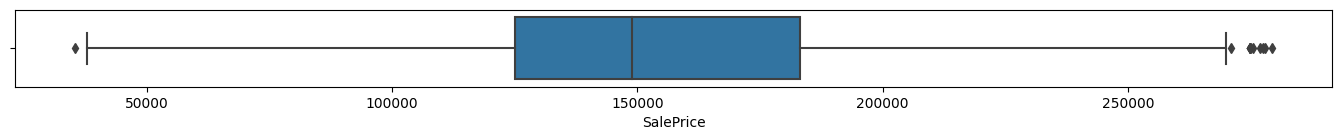

In [ ]:
# Box Plot
import seaborn as sns
for i in li2:
  #sns.boxplot(train[i])
  plt.figure(figsize=(17,1))
  sns.boxplot(data=train, x=i)

In [ ]:
train.describe()

LotArea  OverallQual    YearBuilt  YearRemodAdd   MasVnrArea  \
count   1009.000000  1009.000000  1009.000000   1009.000000  1004.000000   
mean    8790.912785     5.791873  1968.683845   1982.608523    55.055777   
std     3062.966681     1.136643    28.978751     20.992023    93.930464   
min     1300.000000     1.000000  1885.000000   1950.000000     0.000000   
25%     7200.000000     5.000000  1950.000000   1963.000000     0.000000   
50%     8846.000000     6.000000  1970.000000   1988.000000     0.000000   
75%    10500.000000     7.000000  1998.000000   2003.000000    94.000000   
max    17503.000000     9.000000  2009.000000   2010.000000   387.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000  ...   
mean    387.482656   531.027750   960.481665  1057.137760   281.810704  ...   
std     368.345763   389.362178   320.000921   281.647245   371.108396  ...   
min       0.000000     0.000000     0.000000   334.000000     0.000000  ...   
25%       0.000000   216.000000   770.000000   848.000000     0.000000  ...   
50%     360.000000   463.000000   935.000000  1007.000000     0.000000  ...   
75%     656.000000   778.000000  1153.000000  1236.000000   668.000000  ...   
max    1606.000000  1638.000000  1845.000000  1888.000000  1286.000000  ...   

          HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count  1009.000000   1009.000000   1009.000000  1009.000000   947.000000   
mean      0.336967      2.748266      6.066402     0.494549  1975.669483   
std       0.491426      0.692977      1.244253     0.594469    24.967115   
min       0.000000      0.000000      2.000000     0.000000  1900.000000   
25%       0.000000      2.000000      5.000000     0.000000  1958.000000   
50%       0.000000      3.000000      6.000000     0.000000  1977.000000   
75%       1.000000      3.000000      7.000000     1.000000  2000.000000   
max       2.000000      4.000000      9.000000     2.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF      SalePrice  
count  1009.000000  1009.000000  1009.000000  1009.000000    1009.000000  
mean      1.596630   421.264618    73.489594    27.935580  155406.633300  
std       0.664303   180.106165    97.165830    37.557586   46023.646658  
min       0.000000     0.000000     0.000000     0.000000   35311.000000  
25%       1.000000   294.000000     0.000000     0.000000  125000.000000  
50%       2.000000   440.000000     0.000000     0.000000  149000.000000  
75%       2.000000   533.000000   144.000000    48.000000  183200.000000  
max       3.000000   924.000000   370.000000   146.000000  279500.000000  

[8 rows x 23 columns]

**Filling Null Value & string **

In [ ]:
# Fill null values with the mean of each column
df = train.fillna(train.mean())
test = test.fillna(train.mean())

<ipython-input-309-cae8d9b0e80f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = train.fillna(train.mean())
<ipython-input-309-cae8d9b0e80f>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test = test.fillna(train.mean())


In [ ]:
df.shape

(1460, 75)

Fill Max catogery value into **null**

In [ ]:
string_object=[]
for idx,i in enumerate(df.dtypes):
  if i == 'object':
    string_object.append(df.columns[idx])
    df[df.columns[idx]].fillna(df[df.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(df.columns[idx],i))

MSZoning---------------object
Street---------------object
LotShape---------------object
LandContour---------------object
Utilities---------------object
LotConfig---------------object
LandSlope---------------object
Neighborhood---------------object
Condition1---------------object
Condition2---------------object
BldgType---------------object
HouseStyle---------------object
RoofStyle---------------object
RoofMatl---------------object
Exterior1st---------------object
Exterior2nd---------------object
MasVnrType---------------object
ExterQual---------------object
ExterCond---------------object
Foundation---------------object
BsmtQual---------------object
BsmtCond---------------object
BsmtExposure---------------object
BsmtFinType1---------------object
BsmtFinType2---------------object
Heating---------------object
HeatingQC---------------object
CentralAir---------------object
Electrical---------------object
KitchenQual---------------object
Functional---------------object
GarageType------------

In [ ]:
string_object1=[]
for idx,i in enumerate(test.dtypes):
  if i == 'object':
    string_object1.append(test.columns[idx])
    test[test.columns[idx]].fillna(test[test.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(test.columns[idx],i))

MSZoning---------------object
Street---------------object
LotShape---------------object
LandContour---------------object
Utilities---------------object
LotConfig---------------object
LandSlope---------------object
Neighborhood---------------object
Condition1---------------object
Condition2---------------object
BldgType---------------object
HouseStyle---------------object
RoofStyle---------------object
RoofMatl---------------object
Exterior1st---------------object
Exterior2nd---------------object
MasVnrType---------------object
ExterQual---------------object
ExterCond---------------object
Foundation---------------object
BsmtQual---------------object
BsmtCond---------------object
BsmtExposure---------------object
BsmtFinType1---------------object
BsmtFinType2---------------object
Heating---------------object
HeatingQC---------------object
CentralAir---------------object
Electrical---------------object
KitchenQual---------------object
Functional---------------object
GarageType------------

In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  df[str_obj]= label_encoder.fit_transform(df[str_obj])

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object1:
  print(str_obj)
  test[str_obj]= label_encoder.fit_transform(test[str_obj])

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
df.corr()

Id  MSSubClass  MSZoning   LotArea    Street  LotShape  \
Id             1.000000    0.011156 -0.006096 -0.033226  0.008916  0.032122   
MSSubClass     0.011156    1.000000  0.035900 -0.139781 -0.024969  0.119289   
MSZoning      -0.006096    0.035900  1.000000 -0.034452  0.087654  0.061887   
LotArea       -0.033226   -0.139781 -0.034452  1.000000 -0.197131 -0.165315   
Street         0.008916   -0.024969  0.087654 -0.197131  1.000000 -0.010224   
...                 ...         ...       ...       ...       ...       ...   
MoSold         0.021172   -0.013585 -0.031496  0.001205  0.003690 -0.033455   
YrSold         0.000712   -0.021407 -0.020628 -0.014261 -0.025043  0.036449   
SaleType       0.019773    0.012464  0.097437  0.012292  0.014339 -0.000911   
SaleCondition -0.005806   -0.024940  0.009494  0.034169  0.006064 -0.038118   
SalePrice     -0.021917   -0.084284 -0.166872  0.263843  0.041036 -0.255580   

               LandContour  Utilities  LotConfig  LandSlope  ...  \
Id               -0.019659   0.013324   0.049756   0.005847  ...   
MSSubClass       -0.002940  -0.022844   0.075910  -0.025672  ...   
MSZoning         -0.017854  -0.001192  -0.009895  -0.022055  ...   
LotArea          -0.149083   0.010123  -0.121161   0.436868  ...   
Street            0.115995   0.001682   0.013960  -0.179360  ...   
...                    ...        ...        ...        ...  ...   
MoSold           -0.011599  -0.051552   0.018902   0.007072  ...   
YrSold            0.020507   0.023353  -0.005992  -0.002305  ...   
SaleType         -0.025754  -0.126770   0.014325   0.054858  ...   
SaleCondition     0.033809  -0.089701   0.051579  -0.043095  ...   
SalePrice         0.015453  -0.014314  -0.067396   0.051152  ...   

               EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
Id                  0.002889  -0.046635     0.001330  0.057044 -0.006242   
MSSubClass         -0.012037  -0.043825    -0.026030  0.008283 -0.007683   
MSZoning            0.115509   0.000362     0.019089 -0.003128  0.009293   
LotArea            -0.018340   0.020423     0.043160  0.077672  0.038068   
Street              0.023082   0.007473    -0.033160  0.004413 -0.022733   
...                      ...        ...          ...       ...       ...   
MoSold             -0.028887   0.029474     0.023217 -0.033737 -0.006495   
YrSold             -0.009916   0.018645     0.010694 -0.059689  0.004906   
SaleType           -0.016731  -0.009034     0.004533  0.011009  0.015773   
SaleCondition      -0.098388   0.004379    -0.020095 -0.067251  0.013027   
SalePrice          -0.128578   0.044584     0.111447  0.092404 -0.021190   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
Id             0.021172  0.000712  0.019773      -0.005806  -0.021917  
MSSubClass    -0.013585 -0.021407  0.012464      -0.024940  -0.084284  
MSZoning      -0.031496 -0.020628  0.097437       0.009494  -0.166872  
LotArea        0.001205 -0.014261  0.012292       0.034169   0.263843  
Street         0.003690 -0.025043  0.014339       0.006064   0.041036  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.145721 -0.047386       0.013320   0.046432  
YrSold        -0.145721  1.000000 -0.002327       0.003880  -0.028923  
SaleType      -0.047386 -0.002327  1.000000       0.184067  -0.054911  
SaleCondition  0.013320  0.003880  0.184067       1.000000   0.213092  
SalePrice      0.046432 -0.028923 -0.054911       0.213092   1.000000  

[75 rows x 75 columns]

**Dropping correlated features**

<Axes: >

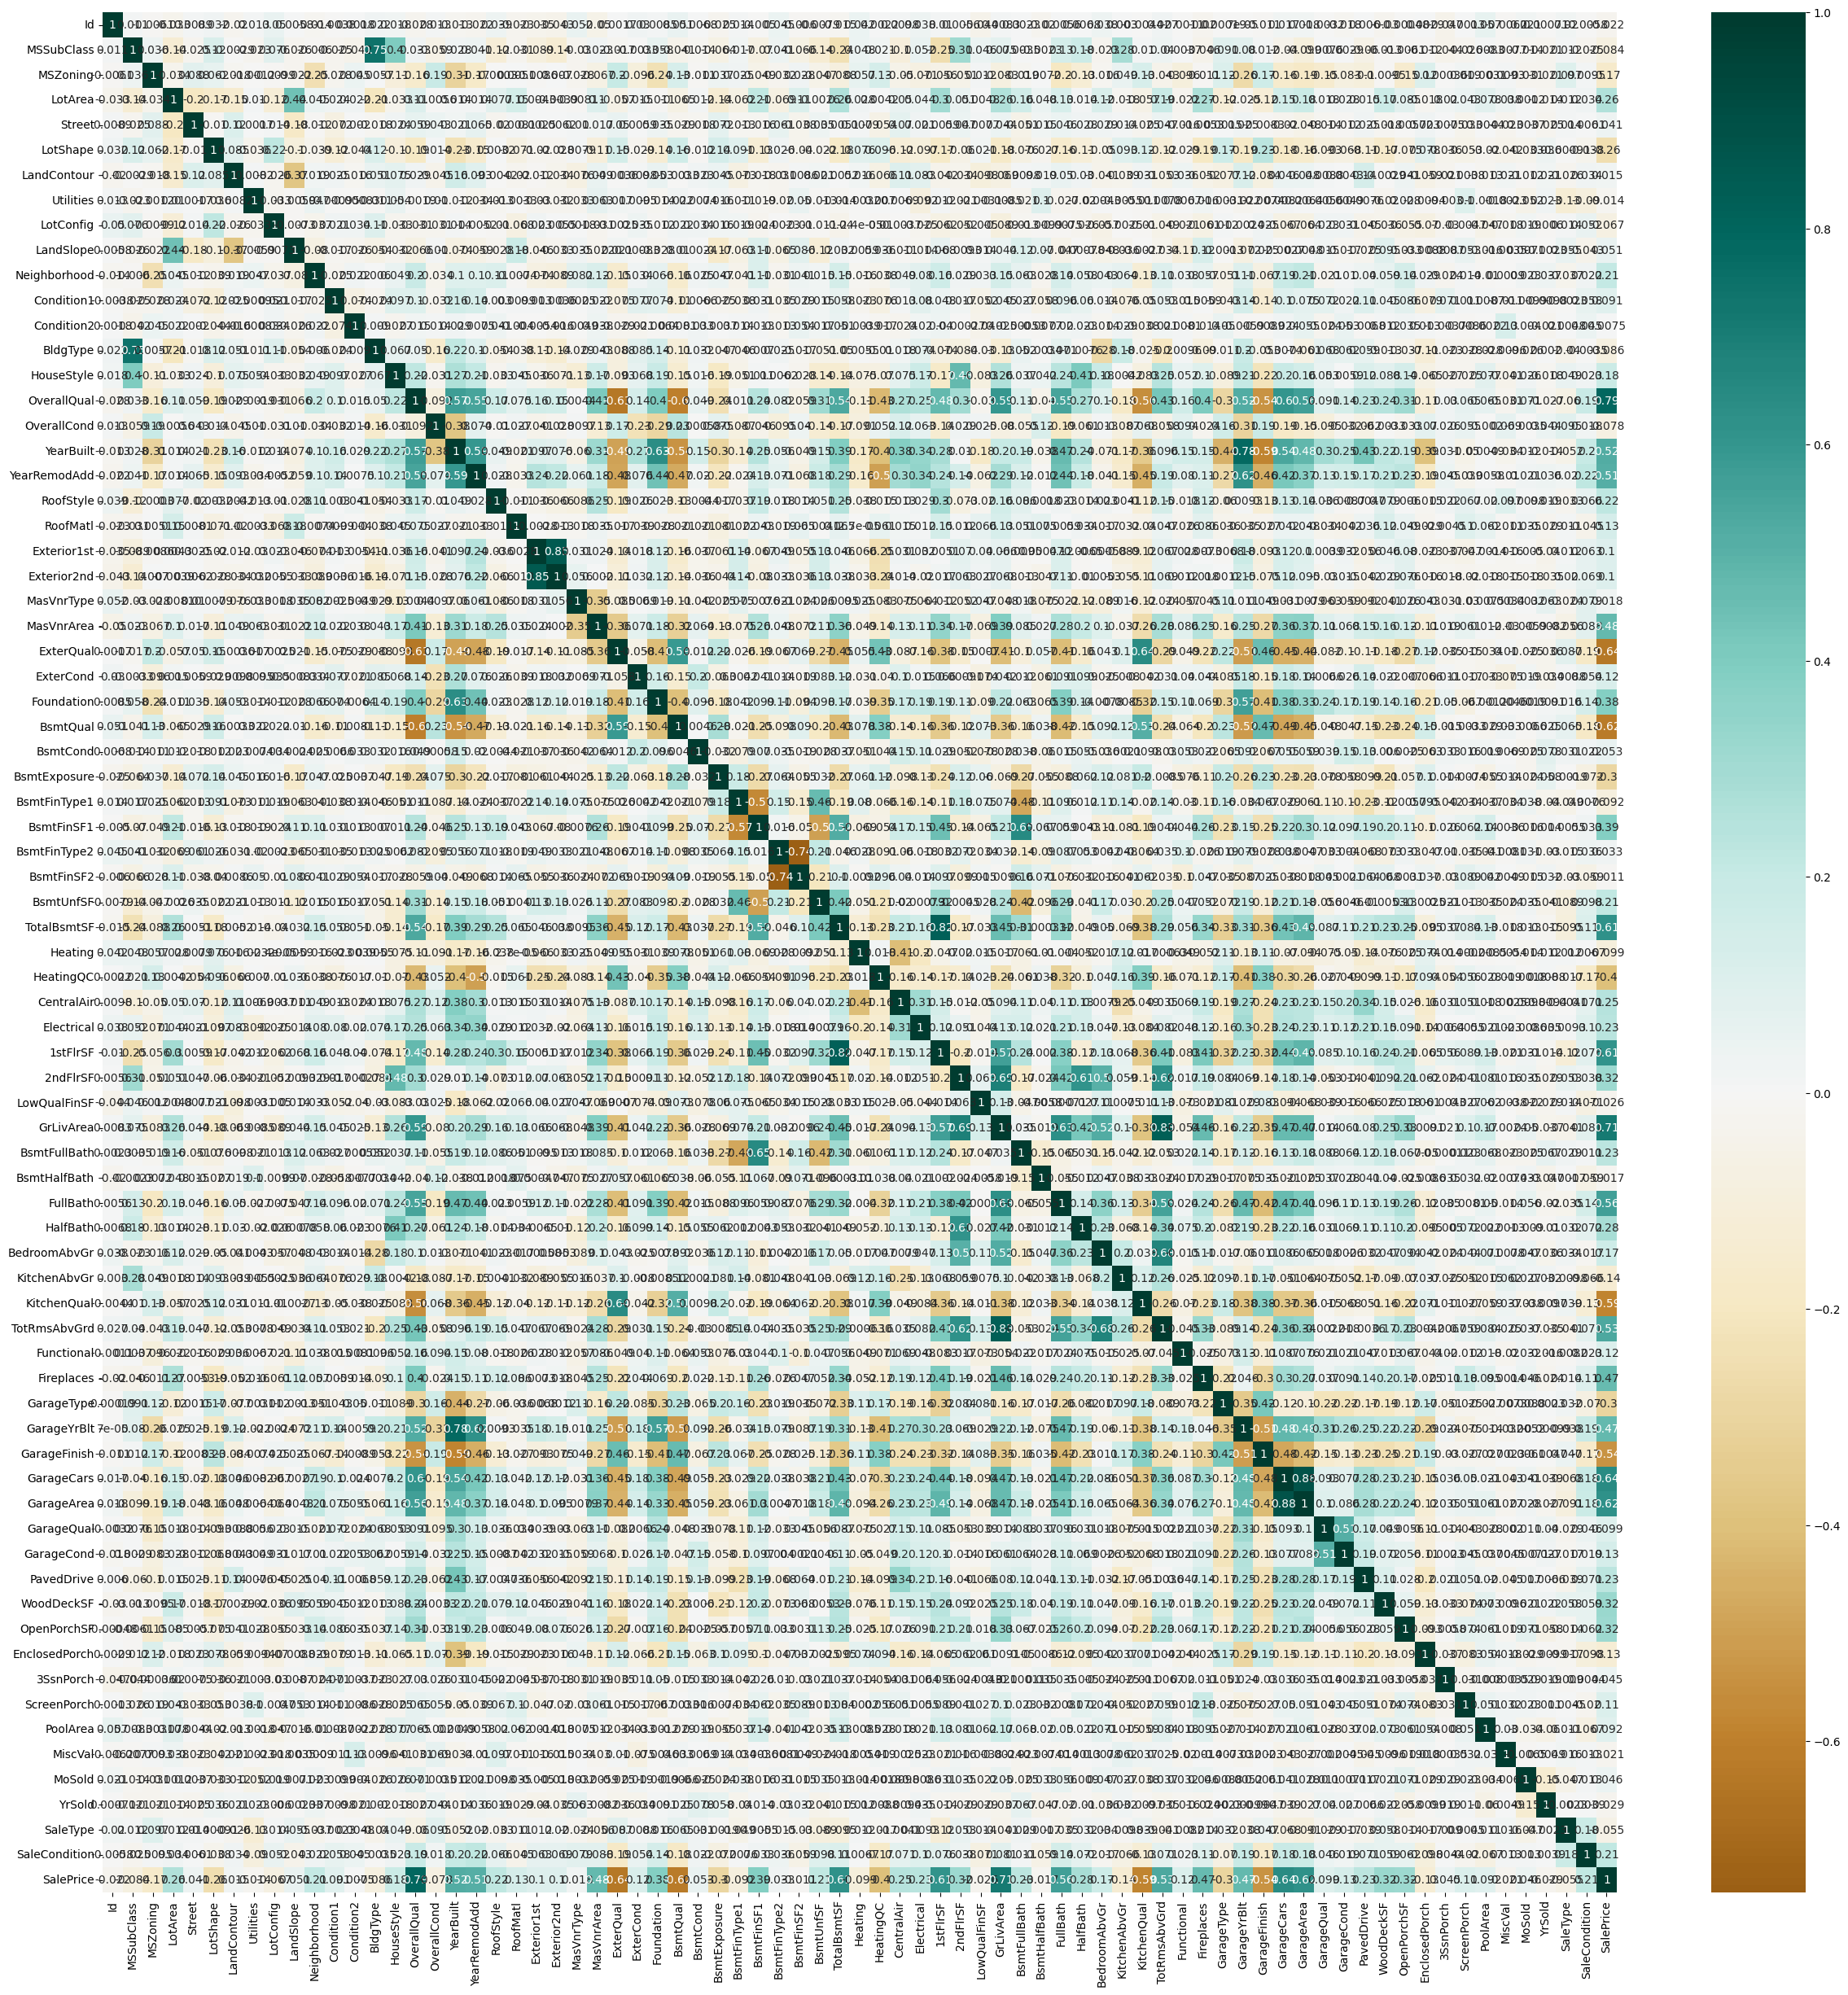

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
heatmap=sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
heatmap

In [ ]:
li2=['Exterior2nd','TotRmsAbvGrd','2ndFlrSF','Utilities','GarageCars','GarageYrBlt']
li_test=['Exterior2nd','TotRmsAbvGrd','2ndFlrSF','Utilities','GarageCars','GarageYrBlt']

In [ ]:
'Exterior2nd','TotRmsAbvGrd','2ndFlrSF',

('Exterior2nd', 'TotRmsAbvGrd', '2ndFlrSF')

In [ ]:
df.drop(li2,axis=1,inplace=True)

In [ ]:
test.drop(li_test,axis=1,inplace=True)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Sal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = df[['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
y=df[['SalePrice']]

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score

In [ ]:
# Create a Random Forest regressor object
rf_regressor = RandomForestRegressor(random_state=10)

# Train the Random Forest model
rf_regressor.fit(X, y)


<ipython-input-326-f12d5a14afe2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X, y)


RandomForestRegressor(random_state=10)

In [ ]:
# Predict on the test set
y_pred = rf_regressor.predict(np.array(test.iloc[0:,:].values))

y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([128927.5 , 153126.5 , 182891.3 , ..., 154517.62, 111649.02,
       230895.02])

In [ ]:
rf_regressor.score(X,y)

0.979751826356997

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
y2 = rf_regressor.predict(np.array(X.iloc[0:,:].values))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
y2

array([206294.78, 174698.5 , 219177.5 , ..., 257783.79, 138521.71,
       149759.  ])

In [ ]:
y

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X, y)

# Make predictions on the testing data
y_pred = clf.predict(np.array(test.iloc[0:,:].values))
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([111250, 207500, 179000, ..., 157900, 121000, 275000])

In [ ]:
# Calculate the accuracy of the model
clf.score(X,y)

1.0

Result_CSV

In [ ]:
testf=pd.read_csv("/content/drive/MyDrive/house_prices_regression_techniques/test.csv")

In [ ]:
data_save = pd.DataFrame({"Id":testf['Id'],"SalePrice":y_pred})
data_save.to_csv("house_pred1.csv",index=False)

In [ ]:
[124544.31, 155844.99, 175813.85, ..., 153266.97, 112847.5 ,
       230947.02]

In [ ]:
y2=rf_regressor.predict(np.array(X.iloc[0:,:].values))
y2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([207767.5 , 175991.8 , 222798.86, ..., 175795.  , 248471.93,
       139078.25])

Root mean Square **Error**

In [ ]:
mean_squared_error(y, y2)

41759256.85479376